In [5]:
import warnings
from tqdm import tqdm
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt

image = plt.imread('butterfly.png')

warnings.filterwarnings('ignore')



In [15]:
"""Support"""

H = np.array([
    [0, 0, -1, 0, 0],
    [0, -1, -2, -1, 0],
    [-1, -2, 16, -2, -1],
    [0, -1, -2, -1, 0],
    [0, 0, -1, 0, 0]
])

def plot_image(convolved):
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(convolved, cmap='gray')
    plt.title('Convolved Image')
    plt.axis('off')

    plt.show()

In [16]:

def convolve_simplified(image, kernel):
    
    np.flipud(np.fliplr(kernel))
    
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    convolved_image = np.zeros_like(image)

    for i in range(image_height):
        for j in range(image_width):
            
            image_patch = padded_image[i:i+kernel_height, j:j+kernel_width]
            convolved_image[i, j] = np.sum(image_patch * kernel)


    return convolved_image

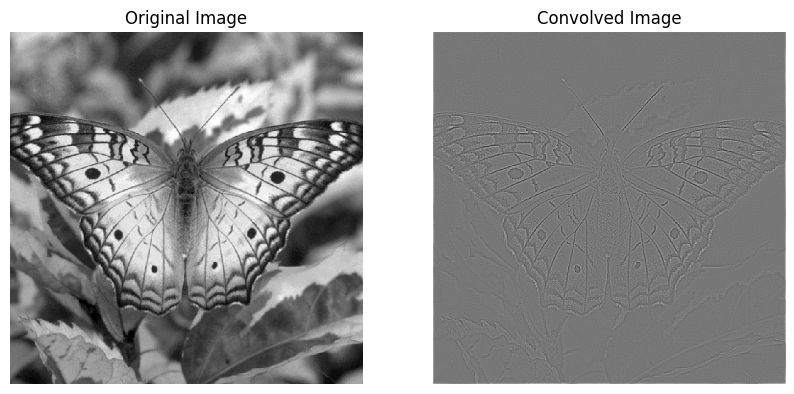

In [17]:
convolved_image = convolve_simplified(image, H)

plot_image(convolved_image)

In [23]:
def first_conv_kernel(image, kernel):
    
    convolved_image = np.zeros(image.shape)
    if (kernel.shape[0] % 2) == 0:
        for i in tqdm(range(image.shape[0])):
            for j in range(image.shape[1]):
                soma = 0
                for x in range(kernel.shape[0]):
                    for y in range(kernel.shape[1]):
                        if ((i+x) > (image.shape[0]-(kernel.shape[0]-1))) or ((j+y) > (image.shape[1]-(kernel.shape[1]-1))):
                            continue
                        soma += image[i+x][j+y] * kernel[x][y] 
                convolved_image[i][j] += soma
        return convolved_image

    for i in tqdm(range(image.shape[0])):
        for j in range(image.shape[1]):
            soma = 0
            for x in range((-1*int((kernel.shape[0]-1)/2)), int((kernel.shape[0]-1)/2)):
                for y in range((-1*int((kernel.shape[1]-1)/2)), int((kernel.shape[1]-1)/2)):
                    if ((i+x) < 0) or ((j+y) < 0) or ((i+x) > (image.shape[0]-((kernel.shape[1]-1)/2))) or ((j+y) > (image.shape[1]-((kernel.shape[1]-1)/2))):
                            continue
                    soma += image[i+x][j+y] * kernel[x][y] 
            convolved_image[i][j] += soma
    return convolved_image

100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [00:19<00:00, 26.64it/s]


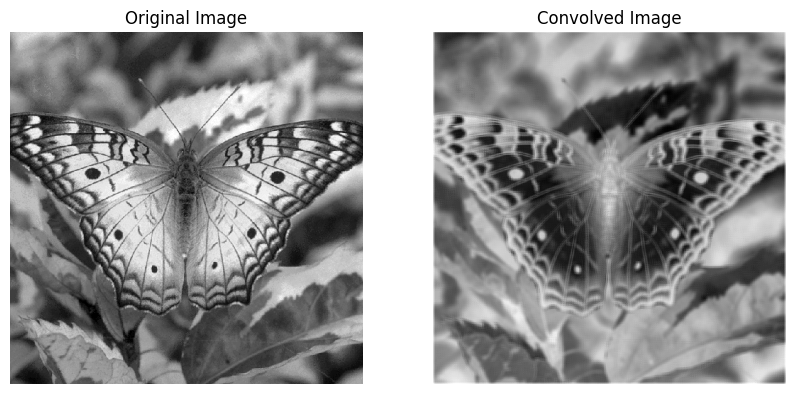

In [24]:
convolved_image = first_conv_kernel(image, H)

plot_image(convolved_image)